In [1]:
from unidecode import unidecode
import matplotlib.pyplot as plt
from zipfile import ZipFile
import mplfinance as mpf
import pandas as pd
import numpy as np
import requests
import json

## API CONFIG

In [2]:
API_KEY = '01NKJDZHS13H8U13'

In [3]:
base_url = 'https://www.alphavantage.co/query'
param_function = '?function=TIME_SERIES_DAILY'
param_symbol   = '&symbol=PETR4.SAO'
param_output   = '&outputsize=full'
param_api_key  = f'&apikey={API_KEY}'

final_url = base_url + param_function + param_symbol + param_output + param_api_key
print(final_url)

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=PETR4.SAO&outputsize=full&apikey=01NKJDZHS13H8U13


## DOWNLOAD DATA AND DATAFRAME IT

In [4]:
 r = requests.get(final_url)

In [6]:
last_update = json.loads(r.content)['Meta Data']['3. Last Refreshed']
time_series = json.loads(r.content)['Time Series (Daily)']

In [7]:
df = pd.DataFrame.from_dict(time_series).T.reset_index()
df.columns = ['day','open','high','low','close','volume']

df['day'] = pd.to_datetime(df['day'])
df = df.set_index('day')

df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)

df = df[df.index >= '2019-01-01']

In [9]:
df = df[['open', 'close']]

In [10]:
df.head()

,open,close
day,,
2021-02-19,28.03,27.33
2021-02-18,30.38,29.27
2021-02-17,28.52,29.59
2021-02-12,27.81,28.44
2021-02-11,28.14,28.08


## GET SETORIAL DATA

In [150]:
df_setorial = pd.read_csv('../data/b3_setorial.csv', sep=';', encoding='latin')

# for index in range(len(df_setorial['segmento'].unique())):
#     print(f"'{df_setorial['segmento'].unique()[index]}' :\
#  '{unidecode(df_setorial['segmento'].unique()[index]).lower().replace(' ','_').replace(',','')}',")


# SETOR
setor_map = {
    'Petróleo, Gás e Biocombustíveis' : 'petroleo_gas_e_biocombustiveis',
    'Materiais Básicos' : 'materiais_basicos',
    'Bens Industriais' : 'bens_industriais',
    'Consumo não Cíclico' : 'consumo_nao_ciclico',
    'Consumo Cíclico' : 'consumo_ciclico',
    'Saúde' : 'saude',
    'Tecnologia da Informação' : 'tecnologia_da_informacao',
    'Comunicações' : 'comunicacoes',
    'Utilidade Pública' : 'utilidade_publica',
    'Financeiro' : 'financeiro',
    'Outros' : 'outros'    
}
df_setorial['setor'] = df_setorial['setor'].map(setor_map)
setor_dummies = pd.get_dummies(df_setorial.setor, prefix='setor', prefix_sep='.').drop(columns='setor.outros')
df_setorial = pd.concat([df_setorial, setor_dummies], axis=1).drop(columns='setor')

# SUBSETOR
subseto_map = {
    'Petróleo, Gás e Biocombustíveis' : 'petroleo_gas_e_biocombustiveis',
    'Mineração' : 'mineracao',
    'Siderurgia e Metalurgia' : 'siderurgia_e_metalurgia',
    'Químicos' : 'quimicos',
    'Madeira e Papel' : 'madeira_e_papel',
    'Embalagens' : 'embalagens',
    'Materiais Diversos' : 'materiais_diversos',
    'Construção e Engenharia' : 'construcao_e_engenharia',
    'Material de Transporte' : 'material_de_transporte',
    'Máquinas e Equipamentos' : 'maquinas_e_equipamentos',
    'Transporte' : 'transporte',
    'Serviços Diversos' : 'servicos_diversos',
    'Comércio' : 'comercio',
    'Agropecuária' : 'agropecuaria',
    'Alimentos Processados' : 'alimentos_processados',
    'Bebidas' : 'bebidas',
    'Produtos de Uso Pessoal e de Limpeza' : 'produtos_de_uso_pessoal_e_de_limpeza',
    'Comércio e Distribuição' : 'comercio_e_distribuicao',
    'Construção Civil' : 'construcao_civil',
    'Tecidos, Vestuário e Calçados' : 'tecidos_vestuario_e_calcados',
    'Utilidades Domésticas' : 'utilidades_domesticas',
    'Automóveis e Motocicletas' : 'automoveis_e_motocicletas',
    'Hoteis e Restaurantes' : 'hoteis_e_restaurantes',
    'Viagens e Lazer' : 'viagens_e_lazer',
    'Diversos' : 'diversos',
    'Medicamentos e Outros Produtos' : 'medicamentos_e_outros_produtos',
    'Serviços Médico - Hospitalares, Análises e Diagnósticos' : 'servicos_medico_-_hospitalares_analises_e_diagnosticos',
    'Equipamentos' : 'equipamentos',
    'Computadores e Equipamentos' : 'computadores_e_equipamentos',
    'Programas e Serviços' : 'programas_e_servicos',
    'Telecomunicações' : 'telecomunicacoes',
    'Mídia' : 'midia',
    'Energia Elétrica' : 'energia_eletrica',
    'Água e Saneamento' : 'agua_e_saneamento',
    'Gás' : 'gas',
    'Intermediários Financeiros' : 'intermediarios_financeiros',
    'Securitizadoras de Recebíveis' : 'securitizadoras_de_recebiveis',
    'Serviços Financeiros Diversos' : 'servicos_financeiros_diversos',
    'Previdência e Seguros' : 'previdencia_e_seguros',
    'Exploração de Imóveis' : 'exploracao_de_imoveis',
    'Holdings Diversificadas' : 'holdings_diversificadas',
    'Outros Títulos' : 'outros_titulos',
    'Outros' : 'outros'
}

df_setorial['subsetor'] = df_setorial['subsetor'].map(setor_map)
setor_dummies = pd.get_dummies(df_setorial.subsetor, prefix='subsetor', prefix_sep='.').drop(columns='subsetor.outros')
df_setorial = pd.concat([df_setorial, setor_dummies], axis=1).drop(columns='subsetor')

# SEGMENTO
segmento_map = {
    'Exploração, Refino e Distribuição' : 'exploracao_refino_e_distribuicao',
    'Equipamentos e Serviços' : 'equipamentos_e_servicos',
    'Minerais Metálicos' : 'minerais_metalicos',
    'Siderurgia' : 'siderurgia',
    'Artefatos de Ferro e Aço' : 'artefatos_de_ferro_e_aco',
    'Artefatos de Cobre' : 'artefatos_de_cobre',
    'Petroquímicos' : 'petroquimicos',
    'Fertilizantes e Defensivos' : 'fertilizantes_e_defensivos',
    'Químicos Diversos' : 'quimicos_diversos',
    'Madeira' : 'madeira',
    'Papel e Celulose' : 'papel_e_celulose',
    'Embalagens' : 'embalagens',
    'Materiais Diversos' : 'materiais_diversos',
    'Produtos para Construção' : 'produtos_para_construcao',
    'Construção Pesada' : 'construcao_pesada',
    'Engenharia Consultiva' : 'engenharia_consultiva',
    'Serviços Diversos' : 'servicos_diversos',
    'Material Aeronáutico e de Defesa' : 'material_aeronautico_e_de_defesa',
    'Material Rodoviário' : 'material_rodoviario',
    'Motores, Compressores e Outros' : 'motores_compressores_e_outros',
    'Máq. e Equip. Industriais' : 'maq._e_equip._industriais',
    'Máq. e Equip. Construção e Agrícolas' : 'maq._e_equip._construcao_e_agricolas',
    'Armas e Munições' : 'armas_e_municoes',
    'Transporte Aéreo' : 'transporte_aereo',
    'Transporte Ferroviário' : 'transporte_ferroviario',
    'Transporte Hidroviário' : 'transporte_hidroviario',
    'Transporte Rodoviário' : 'transporte_rodoviario',
    'Exploração de Rodovias' : 'exploracao_de_rodovias',
    'Serviços de Apoio e Armazenagem' : 'servicos_de_apoio_e_armazenagem',
    'Material de Transporte' : 'material_de_transporte',
    'Agricultura' : 'agricultura',
    'Açucar e Alcool' : 'acucar_e_alcool',
    'Carnes e Derivados' : 'carnes_e_derivados',
    'Alimentos Diversos' : 'alimentos_diversos',
    'Cervejas e Refrigerantes' : 'cervejas_e_refrigerantes',
    'Produtos de Uso Pessoal' : 'produtos_de_uso_pessoal',
    'Produtos de Limpeza' : 'produtos_de_limpeza',
    'Alimentos' : 'alimentos',
    'Incorporações' : 'incorporacoes',
    'Fios e Tecidos' : 'fios_e_tecidos',
    'Vestuário' : 'vestuario',
    'Calçados' : 'calcados',
    'Acessórios' : 'acessorios',
    'Eletrodomésticos' : 'eletrodomesticos',
    'Móveis' : 'moveis',
    'Utensílios Domésticos' : 'utensilios_domesticos',
    'Automóveis e Motocicletas' : 'automoveis_e_motocicletas',
    'Hotelaria' : 'hotelaria',
    'Restaurante e Similares' : 'restaurante_e_similares',
    'Bicicletas' : 'bicicletas',
    'Brinquedos e Jogos' : 'brinquedos_e_jogos',
    'Produção de Eventos e Shows' : 'producao_de_eventos_e_shows',
    'Viagens e Turismo' : 'viagens_e_turismo',
    'Atividades Esportivas' : 'atividades_esportivas',
    'Serviços Educacionais' : 'servicos_educacionais',
    'Aluguel de carros' : 'aluguel_de_carros',
    'Programas de Fidelização' : 'programas_de_fidelizacao',
    'Tecidos, Vestuário e Calçados' : 'tecidos_vestuario_e_calcados',
    'Produtos Diversos' : 'produtos_diversos',
    'Medicamentos e Outros Produtos' : 'medicamentos_e_outros_produtos',
    'Serviços Médico - Hospitalares, Análises e Diagnósticos' : 'servicos_medico_-_hospitalares_analises_e_diagnosticos',
    'Equipamentos' : 'equipamentos',
    'Computadores e Equipamentos' : 'computadores_e_equipamentos',
    'Programas e Serviços' : 'programas_e_servicos',
    'Telecomunicações' : 'telecomunicacoes',
    'Produção e Difusão de Filmes e Programas' : 'producao_e_difusao_de_filmes_e_programas',
    'Energia Elétrica' : 'energia_eletrica',
    'Água e Saneamento' : 'agua_e_saneamento',
    'Gás' : 'gas',
    'Bancos' : 'bancos',
    'Soc. Crédito e Financiamento' : 'soc._credito_e_financiamento',
    'Soc. Arrendamento Mercantil' : 'soc._arrendamento_mercantil',
    'Securitizadoras de Recebíveis' : 'securitizadoras_de_recebiveis',
    'Gestão de Recursos e Investimentos' : 'gestao_de_recursos_e_investimentos',
    'Serviços Financeiros Diversos' : 'servicos_financeiros_diversos',
    'Seguradoras' : 'seguradoras',
    'Corretoras de Seguros' : 'corretoras_de_seguros',
    'Exploração de Imóveis' : 'exploracao_de_imoveis',
    'Intermediação Imobiliária' : 'intermediacao_imobiliaria',
    'Holdings Diversificadas' : 'holdings_diversificadas',
    'Outros Títulos' : 'outros_titulos',
    'Outros' : 'outros'   
}

df_setorial['segmento'] = df_setorial['segmento'].map(setor_map)
setor_dummies = pd.get_dummies(df_setorial.segmento, prefix='segmento', prefix_sep='.').drop(columns='segmento.outros')
df_setorial = pd.concat([df_setorial, setor_dummies], axis=1).drop(columns='segmento')

df_setorial.drop(columns='listagem_segmento', inplace=True)

In [151]:
df_setorial.head()

,codigo,setor.bens_industriais,setor.comunicacoes,setor.consumo_ciclico,setor.consumo_nao_ciclico,setor.financeiro,setor.materiais_basicos,setor.petroleo_gas_e_biocombustiveis,setor.saude,setor.tecnologia_da_informacao,setor.utilidade_publica,subsetor.petroleo_gas_e_biocombustiveis
0,RRRP,0,0,0,0,0,0,1,0,0,0,1
1,CSAN,0,0,0,0,0,0,1,0,0,0,1
2,DMMO,0,0,0,0,0,0,1,0,0,0,1
3,ENAT,0,0,0,0,0,0,1,0,0,0,1
4,RPMG,0,0,0,0,0,0,1,0,0,0,1


In [122]:
for index in range(len(df_setorial['listagem_segmento'].unique())):
    old_value = df_setorial['listagem_segmento'].unique()[index]
    new_value = unidecode(df_setorial['listagem_segmento'].unique()[index]).lower().strip().replace(' ','_').replace(',','')
    print(f"'{old_value}' : '{new_value}',")

AttributeError: 'float' object has no attribute 'encode'

## CONCAT

In [16]:
df['codigo'] = 'PETR'
merge = df.merge(df_setorial, how='inner', on='codigo')

In [17]:
merge.head()

,open,close,codigo,setor,subsetor,segmento,listagem_segmento
0,28.03,27.33,PETR,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",N2
1,30.38,29.27,PETR,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",N2
2,28.52,29.59,PETR,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",N2
3,27.81,28.44,PETR,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",N2
4,28.14,28.08,PETR,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",N2


### GRAPHS

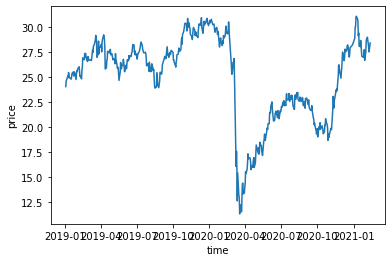

In [128]:
plt.plot(df.index, df["close"])
plt.xlabel("time")
plt.ylabel("price")
plt.show()